**TASK 5.I**

In [1]:
#importing pandas
import pandas as pd

In [2]:
#reading the data
df = pd.read_csv('rawpvr_2018-02-01_28d_1083 TueFri.csv')

In [3]:
#conversion to datetime format
df['DateTime'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')

<ipython-input-3-261ea70a0101>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['DateTime'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')


In [4]:
#filtering the dataframe according to the specified values
filtered_df = df[(df['DateTime'].dt.day_name() == 'Tuesday') &
                 (df['DateTime'].dt.hour >= 7) &
                 (df['DateTime'].dt.hour < 19)]

In [5]:
total_cells = len(filtered_df)

In [6]:
#checking up on the not null values of the Gap (s) column
non_empty_cells = filtered_df['Gap (s)'].notna().sum()

In [7]:
if total_cells > 0:  # To avoid division by zero
    column_completeness = (non_empty_cells * 100) / total_cells
    print(f"Column Completeness for 'Gap (s)' on Tuesdays between 07:00 and 18:59:59: {column_completeness:.2f}%")
else:
      print("No data available for the specified time period.")


Column Completeness for 'Gap (s)' on Tuesdays between 07:00 and 18:59:59: 98.03%


**TASK 5.II**

In [8]:
#df2 for task 5.2

df2 = pd.read_csv('rawpvr_2018-02-01_28d_1083 TueFri.csv')

In [9]:
df2['DateTime'] = pd.to_datetime(df2['Date'], infer_datetime_format=True, errors='coerce')

<ipython-input-9-fd5fb6e888ba>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df2['DateTime'] = pd.to_datetime(df2['Date'], infer_datetime_format=True, errors='coerce')


In [10]:
# Filtering data for NB_MID lane (North direction), on Tuesdays between 07:00 and 18:59:59
filtered_df2 = df2[(df2['Lane Name'] == 'NB_MID') &
                 (df2['Direction Name'] == 'North') &
                 (df2['DateTime'].dt.day_name() == 'Tuesday') &
                 (df2['DateTime'].dt.hour >= 7) &
                 (df2['DateTime'].dt.hour < 19)]

In [11]:
#describtion for the Gap (s) column
gap_column_profile = filtered_df2['Gap (s)'].describe()

In [12]:
#checking for the missing gap in the Gap (s) column
missing_gap_count = filtered_df2['Gap (s)'].isna().sum()

In [13]:
print("Profile of 'Gap (s)' column (non-missing values):")
print(gap_column_profile)
print(f"\nNumber of missing values in 'Gap (s)': {missing_gap_count}")

Profile of 'Gap (s)' column (non-missing values):
count    30503.000000
mean         4.384969
std          6.273902
min          0.006000
25%          1.400000
50%          2.268000
75%          4.249000
max         88.080000
Name: Gap (s), dtype: float64

Number of missing values in 'Gap (s)': 619


In [14]:
# Displaying the mode which the most frequent value for the Gap (s) column
mode_value = filtered_df2['Gap (s)'].mode()
if not mode_value.empty:
    print(f"\nMode of 'Gap (s)': {mode_value.values[0]}")
else:
    print("\nMode of 'Gap (s)': Not available (no mode)")


Mode of 'Gap (s)': 1.24


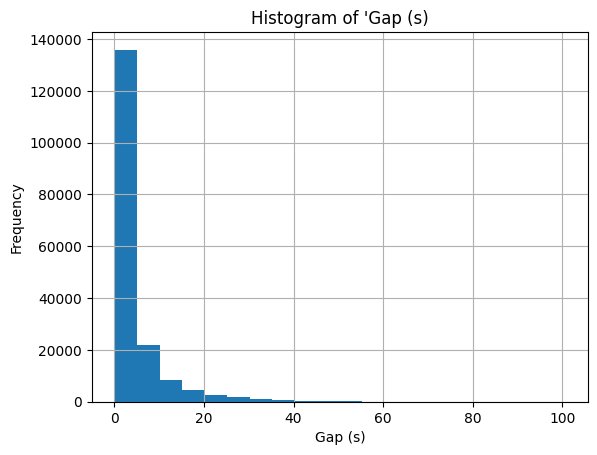

In [22]:
#a histogram to visualize distribution of 'Gap (s)'
import matplotlib.pyplot as plt

filtered_df['Gap (s)'].dropna().hist(bins=20)
plt.title("Histogram of 'Gap (s)")
plt.xlabel("Gap (s)")
plt.ylabel("Frequency")
plt.show()

**Task 5.III**

In [16]:
# Filtering data for NB_MID lane (North direction), on Tuesdays between 07:00 and 18:59:59
filtered_df3 = df[(df['Lane Name'] == 'NB_MID') &
                 (df['Direction Name'] == 'North') &
                 (df['DateTime'].dt.day_name() == 'Tuesday') &
                 (df['DateTime'].dt.hour >= 7) &
                 (df['DateTime'].dt.hour < 19)]

In [17]:
# Calculating the median value of the 'Gap (s)' column
median_gap = filtered_df3['Gap (s)'].median()


In [18]:
filtered_df3['Gap (s)'].fillna(median_gap, inplace=True)

<ipython-input-18-646507b5c637>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df3['Gap (s)'].fillna(median_gap, inplace=True)
<ipython-input-18-646507b5c637>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3['Gap (s)'].fillna(median_gap, inplace=True)


In [19]:
gap_count_after_imputation = filtered_df3['Gap (s)'].isna().sum()

In [20]:
#checking for the gap count after the imputation for missing values in the gap column
gap_count_after_imputation

0

In [21]:
 print(f"Median value used to fill missing values: {median_gap}")
print(f"Number of missing values after imputation: {gap_count_after_imputation}")


Median value used to fill missing values: 2.268
Number of missing values after imputation: 0
